# Gender Classification using Decision tree, KNN, SVC

##  For long time, doctors, fitness centers and even the military collect Males and Females Heigh Weigth and Body mass index. Rather than using the mody measurement to determine if a person is within the normal weight scale, let's use that data to predict gender.



## The data was obtain from the following [500 Person Gender-Height-Weight-Body Mass Index](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex). 
- find Jupyter Notebook at my [Github Repo](https://github.com/OuedraogoAbdoul/Gender-Classifier/blob/master/gender_classifier.ipynb)
- We will intentionaly not splitting the dataset as train and test data
- preidction will be made using randon celebrity data
- We will load the data 
- Process the data
- Use several machine learning model to complete the prediction
- Note that the dataset is under GPL 2 License

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the data  and Decriptive Statistics + Data Cleaning

In [85]:
columns = ["Height", "Weight", "Index"]
target_predict = ["Gender"]
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Let generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [86]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


Now we can count the number of no numerical data in the dataset. Note that we already found the answer from above command using df.info and df.describe

In [88]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

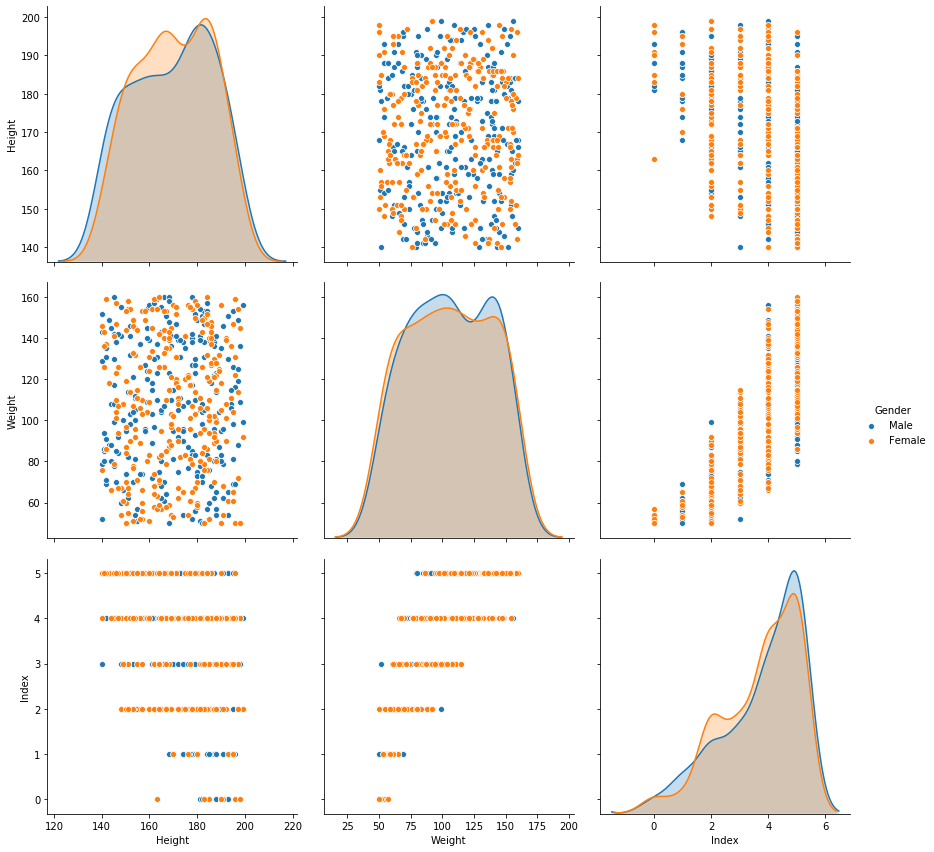

In [89]:
sns.pairplot(df, hue="Gender", height=4);

Let's use Pearson corr to look at the correlation beetween the dataset

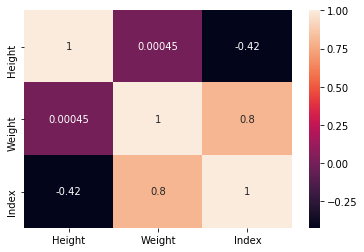

In [90]:
person_corr = df.corr()
sns.heatmap(person_corr, annot=True);

Import Sklearn models

In [91]:
from sklearn import tree
trees = tree.DecisionTreeClassifier()

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC(kernel='linear')
from sklearn.model_selection import cross_val_score

In [92]:
input_values = df[["Height", "Weight", "Index"]]
target_values = df["Gender"]

### let's create three sklearn models to train the data

In [93]:
clftree = trees.fit(input_values, target_values)
clfknn = knn.fit(input_values, target_values)
clfsvc = svc.fit(input_values, target_values)

### Time to predict based on the same input using different models
We will pick real value from the data set to make an intial prediction

In [94]:
# first three row
df.head(3)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4


In [95]:
prediction1 = clftree.predict([[174, 96, 4]])
predictionknn1 = clfknn.predict([[189, 87, 2]])
predictionsvc1 = clfsvc.predict([[185, 110, 4]])

### Print the first three models prediction

In [96]:
print("This is the tree() model: ", prediction1)
print("This is the knn() model: ", predictionknn1)
print("This is the svc() model: ", predictionsvc1)

This is the tree() model:  ['Male']
This is the knn() model:  ['Female']
This is the svc() model:  ['Female']


Let's predict using real values from the last 3 rows

In [97]:
df.tail(3)

,Gender,Height,Weight,Index
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [98]:
prediction = clftree.predict([[141, 136, 5]])
predictionknn = clfknn.predict([[150, 95, 5]])
predictionsvc = clfsvc.predict([[173, 131, 5]])

### Print the last three models prediction

In [99]:
print("This is the tree() model: ", prediction)
print("This is the knn() model: ", predictionknn)
print("This is the svc() model: ", predictionsvc)

This is the tree() model:  ['Female']
This is the knn() model:  ['Female']
This is the svc() model:  ['Female']


## As noticed, Decision tree seems to be more accurate at the prediction 

### Now we change the input value by choosing random celebrity body information and predict their gender using decision tree which happens to be the best performer

In [100]:
Gal_Gadot = clftree.predict([[177.8, 58, 18.4]])
Beyonce = clftree.predict([[169, 65, 22.7]])
KEANU_REEVES = clftree.predict([[184.8, 87, 24.5]])

In [101]:
print("This is the tree() model: ", Gal_Gadot)
print("This is the knn() model: ", Beyonce )
print("This is the svc() model: ", KEANU_REEVES)

This is the tree() model:  ['Female']
This is the knn() model:  ['Male']
This is the svc() model:  ['Male']


In summary, we found out that our decision tree perform better that the SVC and the Knn models. Sklearn made it simple for data scientist to test multiples model with ease.